# Homework 4

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

-- --
## Task 1

In this opportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

Steps:

1. Load the file.
2. Clean the DataFrame, so check if the DataFrame has:
    - NaN values and remove them.
    - duplicate rows and remove them.
    - any other problems like out of range values and remove them.

3. Plot the gravity *disturbance* & *distance* and the *bathimetry* & *distance* using `subplot`. Make the plot as if you were going to put it in an article.

In [2]:
# Loading the data
hawaii_data_file = Path(".")/"hawaii-profile.csv"
hawaii_data_raw  = pd.read_csv(hawaii_data_file)
hawaii_data_raw.head()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


In [3]:
# Describing the data
hawaii_data_raw.describe()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
count,212.000000,212.000000,212.000000,211.000000,207.000000
mean,21.111290,-158.118470,1180.643722,-4.870590,10.311125
std,4.824928,4.094885,702.547323,0.993590,37.264172
min,13.000000,-165.000000,0.000000,-5.688246,-250.043523
25%,16.876256,-161.711055,564.274482,-5.500723,-1.366804
50%,21.167085,-158.070352,1188.899176,-5.263460,3.782611
75%,25.209171,-154.640704,1777.313742,-4.400992,14.908498
max,29.500000,-151.000000,2401.938436,0.230937,194.485171


In [4]:
# Asking for possible null values
hawaii_data_raw.isnull().any()

latitude            False
longitude           False
distance_km         False
topography_km        True
disturbance_mgal     True
dtype: bool

In [5]:
# Asking for possible repeated values
hawaii_data_raw.duplicated().any()

True

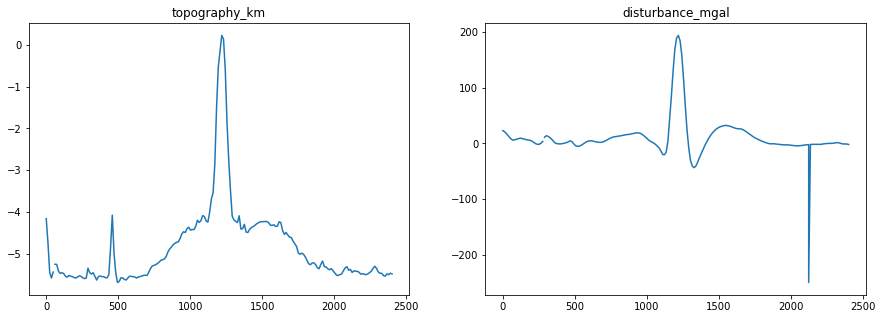

In [23]:
# Plotting and exploring the data
col_names = hawaii_data_raw.columns.to_list()

# Creating layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Drawing subplots
plt.subplot(1, 2, 1)
plt.plot(hawaii_data_raw[col_names[2]], hawaii_data_raw[col_names[3]])
axes[0].set_title(col_names[3])

plt.subplot(1, 2, 2)
plt.plot(hawaii_data_raw[col_names[2]], hawaii_data_raw[col_names[4]])
axes[1].set_title(col_names[4])

plt.show()

In [26]:
# Dropping nulls, duplicates, and out of range values
hawaii_data = hawaii_data_raw.dropna()
hawaii_data = hawaii_data.drop_duplicates()
hawaii_data = hawaii_data[hawaii_data["disturbance_mgal"] > -100]

In [27]:
# Printing the new dimensiones
print("Previous dimensions : " + str(hawaii_data_raw.shape))
print("Current dimensions  : " + str(hawaii_data.shape))

Previous dimensions : (212, 5)
Current dimensions  : (200, 5)


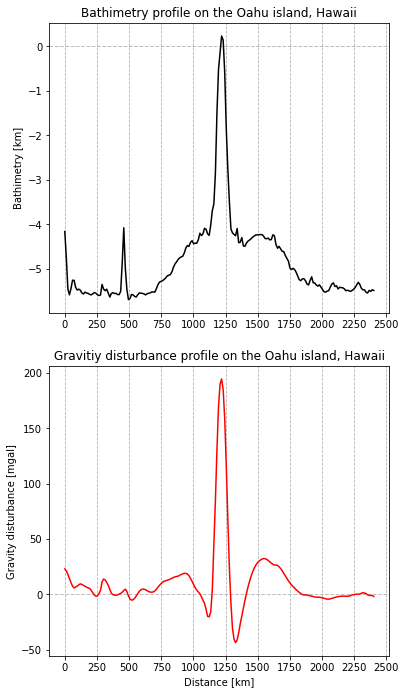

In [94]:
# Plotting clean data
col_names = hawaii_data.columns.to_list()

# Creating layout
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

# Drawing subplot (0)
plt.subplot(2, 1, 1)
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.plot(hawaii_data[col_names[2]], 
         hawaii_data[col_names[3]],
         color="black")
plt.grid(axis="x", linestyle='--')

axes[0].set_title("Bathimetry profile on the Oahu island, Hawaii")
axes[0].set_xlabel("")
axes[0].set_ylabel("Bathimetry [km]")
axes[0].set_xticks(np.linspace(0, 2500, 11), minor=False)

# Drawing subplot (1)
plt.subplot(2, 1, 2)
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.plot(hawaii_data[col_names[2]], 
         hawaii_data[col_names[4]],
         color="red")
plt.grid(axis="x", linestyle='--')

axes[1].set_title("Gravitiy disturbance profile on the Oahu island, Hawaii")
axes[1].set_xlabel("Distance [km]")
axes[1].set_ylabel("Gravity disturbance [mgal]")
axes[1].set_xticks(np.linspace(0, 2500, 11), minor=False)

# Showing the plot
fig.tight_layout(pad=2.0)
plt.show()

-- --

## Bonus Track

We can see from the bathymetry profile that there is a long-wavelength component (almost a gaussian shape) right around the islands. This is due to the thermal swell of the hotspot and not part of the flexure response of the oceanic lithosphere. The swell is isostatically compensated, as seen in the gravity disturbance. We'll fit a gaussian curve to the profile data and remove it from our observations to obtain a residual.

Steps:

1. Define the gaussian function: ℎ𝑔𝑎𝑢𝑠𝑠(𝑥)=ℎ0+𝐺exp(−(𝑥−𝑥0)2𝜎2)
2. Estimate the parameters of this function (ℎ0, 𝐺, 𝑥0, 𝜎). You can start with (ℎ0, 𝐺, 𝑥0, 𝜎) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calculate the thermal swell.
4. Calculate a residual topography and store it in our original DataFrame: 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙=𝑡𝑜𝑝𝑜𝑔𝑟𝑎𝑝ℎ𝑦𝑘𝑚−𝑠𝑤𝑒𝑙𝑙.
5. Make the plot using subplot as if you were going to put it in an article.

In [100]:
# Definning function
def h_gaussian(x, h0=-5.5, G=1.5, x0=1300, sigma=450):
    """
    Provide an almost Gaussian function evaluated in 'x' values, with parameters 'h0', 'G', 'x0', and 'sigma'.
    
    -- Parameters:
    x     : list or numpy array.
            Values used to evaluate the Gaussian function h(x).
    h0    : float, optional.
            First parameter of h(x).
    G     : float, optional.
            Second parameter of h(x).
    x0    : float, optional.
            Location parameter of h(x).
    sigma : float, optional.
            Scale parameter of h(x).
            
    -- Returns:
    h_values : numpy array.
               Values obtained by evaluating h(x).
    """
    
    tempCalc1 = -((x-x0)/sigma)**2
    h_values  = h0 + G*np.exp(tempCalc1)
    
    return h_values
# h_gaussian END

h_gaussian?

Signature: h_gaussian(x, h0=-5.5, G=1.5, x0=1300, sigma=450)
Docstring:
Provide an almost Gaussian function evaluated in 'x' values, with parameters 'h0', 'G', 'x0', and 'sigma'.

-- Parameters:
x     : list or numpy array.
        Values used to evaluate the Gaussian function h(x).
h0    : float, optional.
        First parameter of h(x).
G     : float, optional.
        Second parameter of h(x).
x0    : float, optional.
        Location parameter of h(x).
sigma : float, optional.
        Scale parameter of h(x).
        
-- Returns:
h_values : numpy array.
           Values obtained by evaluating h(x).
File:      /tmp/ipykernel_670401/3469791655.py
Type:      function


In [188]:
# Initial parameters [h0, G, x0, sigma]
h_parameters = [-5.5, 1.5, 1300, 450]

x_values = np.array(hawaii_data["distance_km"])
y_values = np.array(hawaii_data["topography_km"])
h_values = h_gaussian(x_values, h_parameters[0], h_parameters[1], h_parameters[2], h_parameters[3])

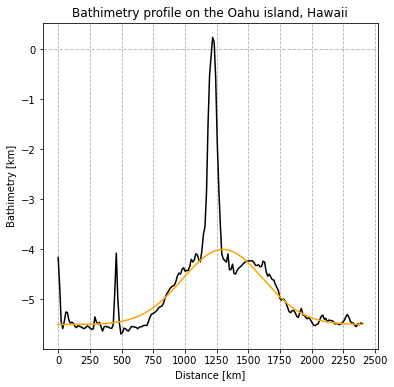

In [189]:
# Plotting
col_names = hawaii_data.columns.to_list()

# Creating layout
fig= plt.figure(figsize=(6, 6))

# Drawing subplot (0)
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.plot(hawaii_data[col_names[2]], 
         hawaii_data[col_names[3]],
         color="black")
plt.plot(x_values, 
         h_values, 
         color="orange")


plt.grid(axis="x", linestyle='--')
plt.title("Bathimetry profile on the Oahu island, Hawaii")
plt.xlabel("Distance [km]")
plt.ylabel("Bathimetry [km]")
plt.xticks(np.linspace(0, 2500, 11))

plt.show()

In [190]:
# Estimating the parameters of h_gaussian(h)
from scipy.optimize import curve_fit

h_fit_parameters = sp.optimize.curve_fit(h_gaussian, x_values, y_values, p0=h_parameters)
h_fit_parameters = h_fit_parameters[0]
print(h_fit_parameters)

[  -5.09159065    5.06487419 1218.18539122   62.50702408]


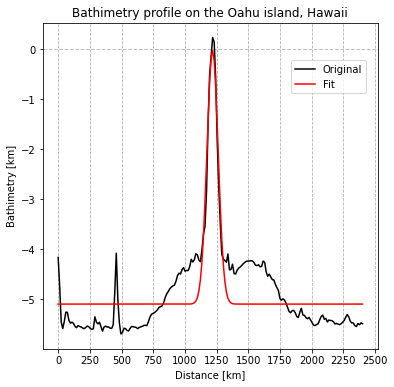

In [214]:
# Plotting
col_names = hawaii_data.columns.to_list()
h_values = h_gaussian(x_values, h_fit_parameters[0], h_fit_parameters[1], h_fit_parameters[2], h_fit_parameters[3])

# Creating layout
fig= plt.figure(figsize=(6, 6))

# Drawing subplot (0)
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.plot(hawaii_data[col_names[2]], 
         hawaii_data[col_names[3]],
         color="black",
         label="Original")
plt.plot(x_values, 
         h_values, 
         color="red",
        label="Fit")

plt.grid(axis="x", linestyle='--')
plt.title("Bathimetry profile on the Oahu island, Hawaii")
plt.xlabel("Distance [km]")
plt.xticks(np.linspace(0, 2500, 11))
plt.ylabel("Bathimetry [km]")
plt.legend(loc ="upper right", bbox_to_anchor=(0.98, 0.90))

plt.show()

In [ ]:
#